# 1.まずそれぞれの推論を試してみる

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import sys, os
from pathlib import Path
# signalfuncなどのある親ディレクトリのパスを取得,これはJupyter系特有の書き方
current_dir = os.path.join(Path().resolve())
# モジュールのあるパスを追加
sys.path.append(str(current_dir) + '/../')
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass

import ml_modules as mm

In [2]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import SVC, LinearSVC
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_val_predict, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
from mlxtend.classifier import StackingClassifier
from scipy import interp

/Users/Zi/anaconda3/envs/jupyter-env/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [4]:
from skater.model import InMemoryModel
from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer
from skater.core.explanations import Interpretation

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import lightgbm as lgb
import xgboost as xgb

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [7]:
df_train_data = pd.read_csv('../data/wine_train.csv')
df_train_data = pd.get_dummies(df_train_data)

In [8]:
bins = [0,5,7,10]
labels = [0,1,2]

df_train_data['quality_range']=pd.cut(x=df_train_data['quality'], bins=bins, labels=labels)

In [9]:
details = mm.rstr(df_train_data, 'quality')
details

Data shape: (5497, 15)
___________________________
Data types:
 float64    4
int64      3
object     2
dtype: int64
___________________________


,types,counts,distincts,nulls,missing_ration,uniques,skewness,kurtosis,corr quality
fixed.acidity,float64,5497,104,0,0.0,"[5.8, 5.4, 7.4, 7.0, 7.9, 6.1, 5.6, 6.2, 11.9,...",1.732083,5.146521,-0.077304
volatile.acidity,float64,5497,181,0,0.0,"[0.18, 0.835, 0.61, 0.31, 0.35, 0.15, 0.66, 0....",1.480543,2.825178,-0.266449
citric.acid,float64,5497,87,0,0.0,"[0.37, 0.08, 0.01, 0.26, 0.36, 0.29, 0.0, 0.48...",0.355286,1.379355,0.080977
residual.sugar,float64,5497,303,0,0.0,"[1.1, 1.2, 2.0, 7.4, 1.6, 6.2, 2.5, 2.8, 6.9, ...",1.486139,5.006813,-0.041976
chlorides,float64,5497,204,0,0.0,"[0.036000000000000004, 0.046, 0.07400000000000...",5.637169,54.706018,-0.200778
free.sulfur.dioxide,float64,5497,128,0,0.0,"[31.0, 13.0, 28.0, 11.0, 39.0, 7.0, 29.0, 6.0,...",1.298491,9.065928,0.056353
total.sulfur.dioxide,float64,5497,275,0,0.0,"[96.0, 93.0, 38.0, 160.0, 124.0, 151.0, 15.0, ...",0.023181,-0.327189,-0.037969
density,float64,5497,964,0,0.0,"[0.9894200000000001, 0.9924, 0.997479999999999...",0.589583,7.615904,-0.313193
pH,float64,5497,108,0,0.0,"[3.16, 3.57, 3.48, 3.13, 3.25, 3.6, 3.52, 3.33...",0.396733,0.416000,0.009871
sulphates,float64,5497,109,0,0.0,"[0.48, 0.85, 0.65, 0.46, 0.44, 0.58, 0.39, 0.5...",1.881176,9.585108,0.032083


In [10]:
x = df_train_data[list(set(df_train_data.columns)-set(['type_W','type_R','quality','quality_range']))]
# y = df_train_data['quality_range']
y = df_train_data['quality']

ss = StandardScaler()
scaled_x = pd.DataFrame(columns=x.columns,data=ss.fit_transform(x))

In [11]:
# X_train, X_test, y_train, y_test \
# = train_test_split(scaled_x, y, test_size=0.2, random_state=0)

In [12]:
X_train = pd.read_csv('../data/X_train.csv', header=0, index_col=0)
y_train = pd.read_csv('../data/y_train.csv',names=('l'))
X_test = pd.read_csv('../data/X_test.csv', header=0, index_col=0)
y_test = pd.read_csv('../data/y_test.csv',names=('l'))

In [14]:
clf = Pipeline([
    ('lda', LDA(store_covariance=True)),
#     ('pca', PCA(random_state = 101)),
    ('clf', LogisticRegression(random_state=101))])  

# a list of dictionaries to specify the parameters that we'd want to tune
# n_components= [10, 12]
# whiten = [True] #, False]
C =  [0.003, 0.009, 0.01]#, 0.1, 1.0, 10.0, 100.0, 1000.0]
tol = [0.001, 0.0001] # [1e-06, 5e-07, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01]

param_grid =\
    [{'clf__C': C
     ,'clf__solver': ['liblinear', 'saga'] 
     ,'clf__penalty': ['l1', 'l2']
     ,'clf__tol' : tol 
     ,'clf__class_weight': [None, 'balanced']
},
    {'clf__C': C
     ,'clf__max_iter': [3, 9, 2, 7, 4]
     ,'clf__solver': ['newton-cg', 'sag', 'lbfgs']
     ,'clf__penalty': ['l2']
     ,'clf__tol' : tol 
     ,'clf__class_weight': [None, 'balanced'] 
}]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
LR = Pipeline([
        #('sel', select_fetaures(select_cols=list(shadow))),
        ('scl', StandardScaler()),
        ('gs', gs)
 ]) 

In [15]:
LR.fit(X_train,y_train)

Fitting 5 folds for each of 228 candidates, totalling 1140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   38.8s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1140 out of 1140 | elapsed:  1.4min finished
/Users/Zi/anaconda3/envs/jupyter-env/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gs',
                 GridSearchCV(cv=5, error_score='raise-deprecating',
                              estimator=Pipeline(memory=None,
                                                 steps=[('lda',
                                                         LinearDiscriminantAnalysis(n_components=None,
                                                                                    priors=None,
                                                                                    shrinkage=None,
                                                                                    solver='svd',
                                                                                    store_covariance=True,
                                                                                    tol=0.0001)),
                                                        (

Model Performance metrics:
------------------------------
Accuracy:  51.55% 
Precision: 48.99% 
Recall:    51.55% 
F1 Score:  45.54% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           6       0.49      0.73      0.59       473
           7       0.55      0.06      0.10       200
           5       0.56      0.60      0.58       351
           8       0.00      0.00      0.00        32
           4       0.00      0.00      0.00        38
           3       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         0

   micro avg       0.52      0.52      0.52      1100
   macro avg       0.23      0.20      0.18      1100
weighted avg       0.49      0.52      0.46      1100


Prediction Confusion Matrix:
------------------------------
          Predicted:                     
                   6   7    5  8  4  3  9
Actual: 6        346   6  121  0  0  0  0
        7        175 

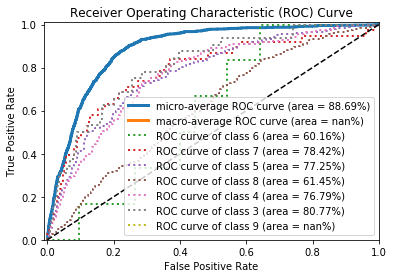

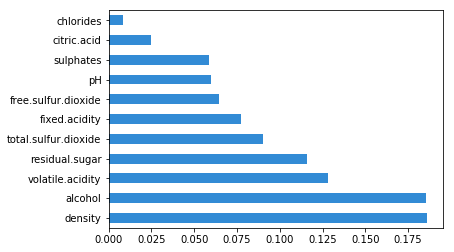

In [17]:
results = mm.get_results(LR,'LogisticRegression', X_test, y_test['l'], gs = gs,target_names=[str(x) for x in y.unique()],target_labels = y.unique(), reasume=True)

In [18]:
results

,Prob,Accuracy,ROC AUC Score,ROC Area
LogisticRegression,True,0.5155,0.598463,NaN


In [19]:
clf = Pipeline([
    ('lda', LDA(store_covariance=True)),
#     ('pca', PCA(random_state = 101)),
        ('clf', DecisionTreeClassifier(random_state=101))])  

# a list of dictionaries to specify the parameters that we'd want to tune
criterion = ['gini', 'entropy']
splitter = ['best']
max_depth = [8, 9, 10, 11] # [15, 20, 25]
min_samples_leaf = [2, 3, 5]
class_weight = ['balanced', None] 

param_grid =\
    [{ 'clf__class_weight': class_weight
      ,'clf__criterion': criterion
      ,'clf__splitter': splitter
      ,'clf__max_depth': max_depth
      ,'clf__min_samples_leaf': min_samples_leaf
}]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
DT = Pipeline([
        ('scl', StandardScaler()),
        ('gs', gs)
 ]) 

In [20]:
DT.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   11.7s finished


Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gs',
                 GridSearchCV(cv=5, error_score='raise-deprecating',
                              estimator=Pipeline(memory=None,
                                                 steps=[('lda',
                                                         LinearDiscriminantAnalysis(n_components=None,
                                                                                    priors=None,
                                                                                    shrinkage=None,
                                                                                    solver='svd',
                                                                                    store_covariance=True,
                                                                                    tol=0.0001)),
                                                        (

Model Performance metrics:
------------------------------
Accuracy:  50.73% 
Precision: 49.46% 
Recall:    50.73% 
F1 Score:  48.90% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           6       0.51      0.61      0.56       473
           7       0.49      0.23      0.32       200
           5       0.54      0.62      0.58       351
           8       0.29      0.12      0.17        32
           4       0.07      0.05      0.06        38
           3       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         0

   micro avg       0.51      0.51      0.51      1100
   macro avg       0.27      0.23      0.24      1100
weighted avg       0.49      0.51      0.49      1100


Prediction Confusion Matrix:
------------------------------
          Predicted:                      
                   6   7    5  8   4  3  9
Actual: 6        287  34  136  3  13  0  0
        7        1

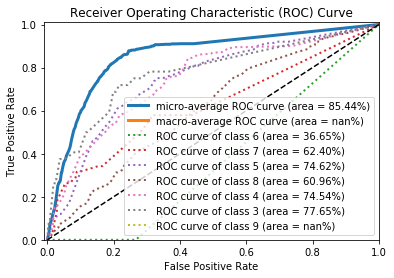

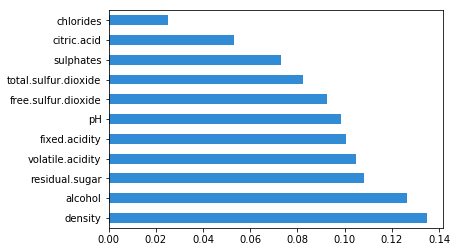

In [21]:
results = mm.get_results(DT, 'DT First', X_test, y_test['l'], gs=gs, target_names=[str(x) for x in y.unique()],target_labels=y.unique(), results=results, reasume=False)

In [22]:
results

,Prob,Accuracy,ROC AUC Score,ROC Area
LogisticRegression,True,0.5155,0.598463,NaN
DT First,True,0.5073,0.615640,NaN


In [25]:
clf = Pipeline([
    ('lda', LDA(store_covariance=True)),
#     ('pca', PCA(random_state = 101)),
    ('clf', SVC(random_state=101, kernel='linear', probability=True))])   

# a list of dictionaries to specify the parameters that we'd want to tune
n_components= [10, 12]
whiten = [True] #, False]
C =  [0.003, 0.009, 0.01]#, 0.1, 1.0, 10.0, 100.0, 1000.0]
tol = [0.001, 0.0001] # [1e-06, 5e-07, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01]
gamma = ['scale', 'auto']


param_grid =\
    [{'clf__C': C
     ,'clf__tol' : tol 
     ,'clf__class_weight': [None, 'balanced']
}]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
svc = Pipeline([
        #('sel', select_fetaures(select_cols=list(shadow))),
        ('scl', StandardScaler()),
        ('gs', gs)
 ]) 

In [26]:
svc.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   54.9s finished


Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gs',
                 GridSearchCV(cv=5, error_score='raise-deprecating',
                              estimator=Pipeline(memory=None,
                                                 steps=[('lda',
                                                         LinearDiscriminantAnalysis(n_components=None,
                                                                                    priors=None,
                                                                                    shrinkage=None,
                                                                                    solver='svd',
                                                                                    store_covariance=True,
                                                                                    tol=0.0001)),
                                                        (

Model Performance metrics:
------------------------------
Accuracy:  51.91% 
Precision: 39.49% 
Recall:    51.91% 
F1 Score:  44.43% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           6       0.49      0.76      0.60       473
           7       0.00      0.00      0.00       200
           5       0.58      0.60      0.59       351
           8       0.00      0.00      0.00        32
           4       0.00      0.00      0.00        38
           3       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         0

   micro avg       0.52      0.52      0.52      1100
   macro avg       0.15      0.19      0.17      1100
weighted avg       0.39      0.52      0.44      1100


Prediction Confusion Matrix:
------------------------------
          Predicted:                    
                   6  7    5  8  4  3  9
Actual: 6        360  0  113  0  0  0  0
        7        186  0 

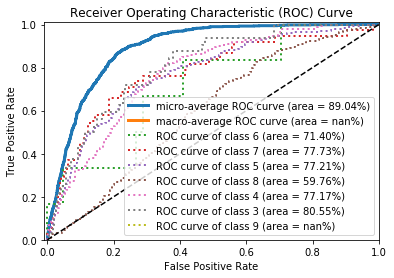

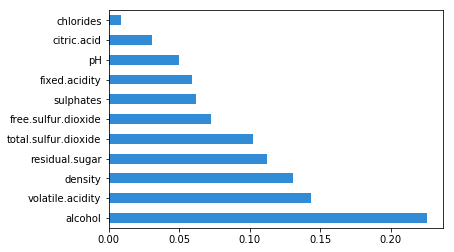

In [28]:
results = mm.get_results(svc,'LinearSVC', X_test, y_test['l'], gs=gs, target_names = [str(x) for x in y.unique()], target_labels = y.unique(), results=results, reasume=False)

In [29]:
results

,Prob,Accuracy,ROC AUC Score,ROC Area
LogisticRegression,True,0.5155,0.598463,NaN
DT First,True,0.5073,0.615640,NaN
LinearSVC,True,0.5191,0.598282,NaN


In [30]:
clf = Pipeline([
    ('lda', LDA(store_covariance=True)),
#         ('pca', PCA(random_state = 101)),
        ('clf', RandomForestClassifier(random_state=101))])  

# a list of dictionaries to specify the parameters that we'd want to tune
SEL = X_train.columns
n_components= [len(SEL)-2, len(SEL)-1, len(SEL)] 
whiten = [True, False]
criterion = ['gini', 'entropy']
class_weight = ['balanced', None] 
n_estimators = [155, 175]  
max_depth  = [20, None] #, 3, 4, 5, 10] # 
min_samples_split = [2, 3, 4]
min_samples_leaf = [1] #, 2 , 3]

param_grid =\
    [{ #'clf__class_weight': class_weight
      'clf__criterion': criterion
      ,'clf__n_estimators': n_estimators      
      ,'clf__min_samples_split': min_samples_split
      ,'clf__max_depth': max_depth
      #,'clf__min_samples_leaf': min_samples_leaf
      #,'pca__n_components' : n_components
      #,'pca__whiten' : whiten
}]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
RF = Pipeline([
        #('sel', select_fetaures(select_cols=SEL)), 
        ('scl', StandardScaler()),
        ('gs', gs)
 ]) 

In [31]:
RF.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.5min finished


Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gs',
                 GridSearchCV(cv=5, error_score='raise-deprecating',
                              estimator=Pipeline(memory=None,
                                                 steps=[('lda',
                                                         LinearDiscriminantAnalysis(n_components=None,
                                                                                    priors=None,
                                                                                    shrinkage=None,
                                                                                    solver='svd',
                                                                                    store_covariance=True,
                                                                                    tol=0.0001)),
                                                        (

Model Performance metrics:
------------------------------
Accuracy:  63.18% 
Precision: 65.24% 
Recall:    63.18% 
F1 Score:  61.53% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           6       0.60      0.74      0.66       473
           7       0.72      0.44      0.54       200
           5       0.65      0.70      0.67       351
           8       0.82      0.28      0.42        32
           4       1.00      0.08      0.15        38
           3       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         0

   micro avg       0.63      0.63      0.63      1100
   macro avg       0.54      0.32      0.35      1100
weighted avg       0.65      0.63      0.62      1100


Prediction Confusion Matrix:
------------------------------
          Predicted:                     
                   6   7    5  8  4  3  9
Actual: 6        348  27   96  2  0  0  0
        7        100 

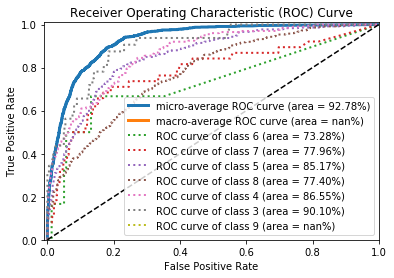

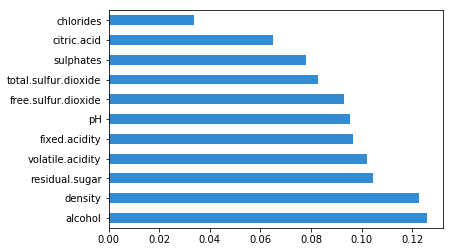

In [33]:
results = mm.get_results(RF, 'RF', X_test, y_test['l'], gs=gs, target_names=[str(x) for x in y.unique()],target_labels=y.unique(), results=results, reasume=False)

In [37]:
clf = Pipeline([
    ('lda', LDA(store_covariance=True)),
#         ('pca', PCA(random_state = 101)),
        ('clf', KNeighborsClassifier())])

# a list of dictionaries to specify the parameters that we'd want to tune
n_components= [len(SEL)-2, len(SEL)-1, len(SEL)] 
whiten = [True, False]

param_grid =\
    [{'clf__n_neighbors': [10, 11, 12, 13] 
     ,'clf__weights': ['distance'] 
     ,'clf__algorithm' : ['ball_tree', 'brute', 'auto',  'kd_tree', 'brute']
     ,'clf__leaf_size': [12, 11, 13]
     ,'clf__p': [1] 
     #,'pca__n_components' : n_components
     #,'pca__whiten' : whiten
     }]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

KNNC = Pipeline([
#         ('sel', select_fetaures(select_cols=SEL)),
        ('scl', StandardScaler()),
        ('gs', gs)
 ]) 

In [38]:
KNNC.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   10.0s finished


Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gs',
                 GridSearchCV(cv=5, error_score='raise-deprecating',
                              estimator=Pipeline(memory=None,
                                                 steps=[('lda',
                                                         LinearDiscriminantAnalysis(n_components=None,
                                                                                    priors=None,
                                                                                    shrinkage=None,
                                                                                    solver='svd',
                                                                                    store_covariance=True,
                                                                                    tol=0.0001)),
                                                        (

Model Performance metrics:
------------------------------
Accuracy:  62.64% 
Precision: 64.16% 
Recall:    62.64% 
F1 Score:  61.22% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           6       0.61      0.70      0.65       473
           7       0.63      0.50      0.56       200
           5       0.64      0.70      0.67       351
           8       0.92      0.34      0.50        32
           4       1.00      0.05      0.10        38
           3       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         0

   micro avg       0.63      0.63      0.63      1100
   macro avg       0.54      0.33      0.35      1100
weighted avg       0.64      0.63      0.61      1100


Prediction Confusion Matrix:
------------------------------
          Predicted:                       
                   6    7    5   8  4  3  9
Actual: 6        330   43  100   0  0  0  0
        7      

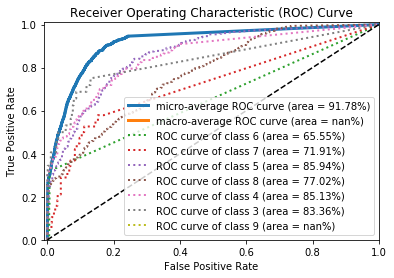

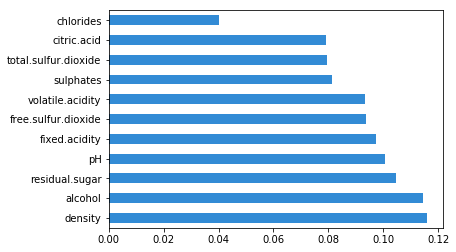

In [39]:
results = mm.get_results(KNNC, 'KNeighborsClassifier', X_test, y_test['l'], gs=gs, target_names=[str(x) for x in y.unique()],
                      target_labels=y.unique(), results=results, reasume=False)

In [40]:
clf = Pipeline([
    ('lda', LDA(store_covariance=True)),
#         ('pca', PCA(random_state = 101)),
        ('clf', lgb.LGBMClassifier(objective='multiclass',
                        num_leaves = 31,
                        learning_rate=0.1,
                        min_child_samples=10,
                        n_estimators=100))])  

# a list of dictionaries to specify the parameters that we'd want to tune
SEL = X_train.columns
n_components= [len(SEL)-2, len(SEL)-1, len(SEL)] 
whiten = [True, False]
criterion = ['gini', 'entropy']
class_weight = ['balanced', None] 
n_estimators = [155, 175]  
max_depth  = [20, None] #, 3, 4, 5, 10] # 
min_samples_split = [2, 3, 4]
min_samples_leaf = [1] #, 2 , 3]

param_grid =\
    [{ #'clf__class_weight': class_weight
      'clf__criterion': criterion
      ,'clf__n_estimators': n_estimators      
      ,'clf__min_samples_split': min_samples_split
      ,'clf__max_depth': max_depth
      #,'clf__min_samples_leaf': min_samples_leaf
      #,'pca__n_components' : n_components
      #,'pca__whiten' : whiten
}]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
GBM = Pipeline([
        #('sel', select_fetaures(select_cols=SEL)), 
        ('scl', StandardScaler()),
        ('gs', gs)
 ]) 

In [41]:
GBM.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.5min finished


Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gs',
                 GridSearchCV(cv=5, error_score='raise-deprecating',
                              estimator=Pipeline(memory=None,
                                                 steps=[('lda',
                                                         LinearDiscriminantAnalysis(n_components=None,
                                                                                    priors=None,
                                                                                    shrinkage=None,
                                                                                    solver='svd',
                                                                                    store_covariance=True,
                                                                                    tol=0.0001)),
                                                        (

Model Performance metrics:
------------------------------
Accuracy:  61.55% 
Precision: 61.51% 
Recall:    61.55% 
F1 Score:  60.41% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           6       0.61      0.71      0.65       473
           7       0.63      0.45      0.52       200
           5       0.64      0.68      0.66       351
           8       0.71      0.31      0.43        32
           4       0.43      0.08      0.13        38
           3       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         0

    accuracy                           0.62      1100
   macro avg       0.43      0.32      0.34      1100
weighted avg       0.62      0.62      0.60      1100


Prediction Confusion Matrix:
------------------------------
          Predicted:                      
                   6   7    5   8  4  3  9
Actual: 6        337  37   95   1  2  0  1
        7         

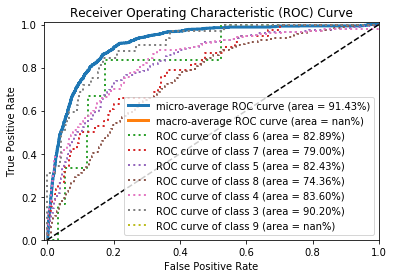

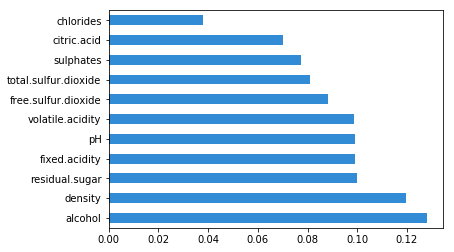

In [42]:
results = mm.get_results(GBM, 'LGBM', X_test, y_test['l'], gs = gs, target_names = [str(x) for x in y.unique()],
                         target_labels = y.unique(), results=results, reasume=False)

In [43]:
results

,Prob,Accuracy,ROC AUC Score,ROC Area
LogisticRegression,True,0.5155,0.598463,NaN
DT First,True,0.5073,0.615640,NaN
LinearSVC,True,0.5191,0.598282,NaN
RF,True,0.6318,0.703590,NaN
KNeighborsClassifier,True,0.6264,0.704421,NaN
LGBM,True,0.6155,0.697762,NaN


In [44]:
clf = Pipeline([
    ('lda', LDA(store_covariance=True)),
#         ('pca', PCA(random_state = 101)),
        ('clf', xgb.XGBClassifier(base_score=0.5, colsample_bylevel=1, n_jobs=1,
                       colsample_bytree=1, gamma=0.0001, max_delta_step=0, random_state=101, 
                       silent=True, subsample=1))])
n_est = [112] #112
max_depth = [15] 
learning_rate = [0.1] 
reg_lambda = [0.7] 
reg_alpha= [0.05]
booster = ['gbtree'] #  'dart'] #,'gblinear',
objective = ['multi:softmax'] #, 'multi:softprob']

param_grid =\
    [{ 
      'clf__n_estimators': n_est
      ,'clf__booster': booster
      ,'clf__objective': objective
      ,'clf__learning_rate': learning_rate
      ,'clf__reg_lambda': reg_lambda
      ,'clf__reg_alpha': reg_alpha
      ,'clf__max_depth': max_depth
}]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=3,
                  verbose=1, n_jobs=3)

XGBC = Pipeline([
        #('sel', select_fetaures(select_cols=SEL)), 
        ('scl', StandardScaler()),
        ('gs', gs)
 ]) 

In [45]:
XGBC.fit(X_train,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    6.6s finished


Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gs',
                 GridSearchCV(cv=3, error_score='raise-deprecating',
                              estimator=Pipeline(memory=None,
                                                 steps=[('lda',
                                                         LinearDiscriminantAnalysis(n_components=None,
                                                                                    priors=None,
                                                                                    shrinkage=None,
                                                                                    solver='svd',
                                                                                    store_covariance=True,
                                                                                    tol=0.0001)),
                                                        (

Model Performance metrics:
------------------------------
Accuracy:  61.64% 
Precision: 60.60% 
Recall:    61.64% 
F1 Score:  60.19% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           6       0.60      0.71      0.65       473
           7       0.60      0.43      0.50       200
           5       0.66      0.69      0.68       351
           8       0.59      0.31      0.41        32
           4       0.38      0.08      0.13        38
           3       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         0

   micro avg       0.62      0.62      0.62      1100
   macro avg       0.40      0.32      0.34      1100
weighted avg       0.61      0.62      0.60      1100


Prediction Confusion Matrix:
------------------------------
          Predicted:                      
                   6   7    5   8  4  3  9
Actual: 6        336  45   88   2  2  0  0
        7        1

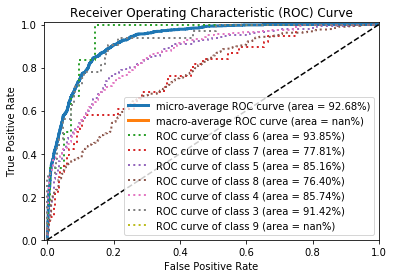

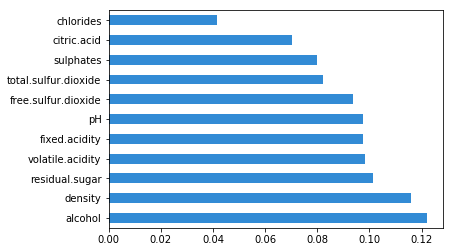

In [46]:
results = mm.get_results(XGBC, 'XGBC', X_test, y_test['l'], gs=gs, 
                         target_names = [str(x) for x in y.unique()], 
                         target_labels = y.unique() ,results=results,reasume=False)

In [47]:
clf = Pipeline([
    ('lda', LDA(store_covariance=True)),
#         ('pca', PCA(random_state = 101)),
        ('clf', GradientBoostingClassifier(random_state=101))])  

# a list of dictionaries to specify the parameters that we'd want to tune
#cv=None, dual=False,  scoring=None, refit=True,  multi_class='ovr'
SEL = X_train.columns
n_components= [len(SEL)-2, len(SEL)-1, len(SEL)] 
whiten = [True, False]
learning_rate =  [1e-02] #, 5e-03, 2e-02]
n_estimators= [400]
max_depth = [10]
n_comp = [2, 3, 4, 5]

param_grid =\
    [{'clf__learning_rate': learning_rate
     ,'clf__max_depth': max_depth
     ,'clf__n_estimators' : n_estimators 
     #,'pca__n_components' : n_components
     #,'pca__whiten' : whiten
}]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

GBC = Pipeline([
        #('sel', select_fetaures(select_cols=SEL)),
        ('scl', StandardScaler()),
        ('gs', gs)
 ])  

In [48]:
GBC.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.2min finished


Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gs',
                 GridSearchCV(cv=5, error_score='raise-deprecating',
                              estimator=Pipeline(memory=None,
                                                 steps=[('lda',
                                                         LinearDiscriminantAnalysis(n_components=None,
                                                                                    priors=None,
                                                                                    shrinkage=None,
                                                                                    solver='svd',
                                                                                    store_covariance=True,
                                                                                    tol=0.0001)),
                                                        (

Model Performance metrics:
------------------------------
Accuracy:  64.00% 
Precision: 64.76% 
Recall:    64.00% 
F1 Score:  62.46% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           6       0.61      0.75      0.67       473
           7       0.70      0.47      0.56       200
           5       0.66      0.69      0.68       351
           8       0.71      0.31      0.43        32
           4       0.67      0.05      0.10        38
           3       0.50      0.17      0.25         6
           9       0.00      0.00      0.00         0

   micro avg       0.64      0.64      0.64      1100
   macro avg       0.55      0.35      0.38      1100
weighted avg       0.65      0.64      0.62      1100


Prediction Confusion Matrix:
------------------------------
          Predicted:                      
                   6   7    5   8  4  3  9
Actual: 6        355  29   86   1  1  1  0
        7         

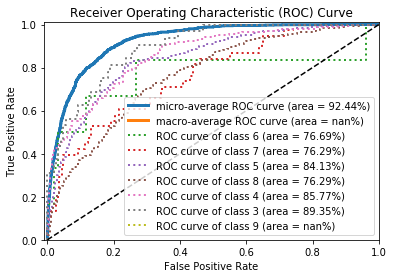

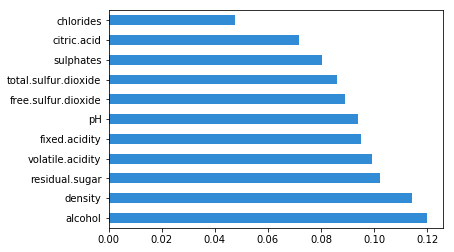

In [49]:
results = mm.get_results(GBC, 'GradientBoostingClassifier', X_test, y_test['l'], gs=gs,
                         target_names=[str(x) for x in y.unique()], target_labels=y.unique()
                      ,results=results, reasume=False)

In [51]:
clf = Pipeline([
    ('lda', LDA(store_covariance=True)),
#         ('pca', PCA(random_state = 101)),
        ('clf', AdaBoostClassifier(random_state=101))])

# a list of dictionaries to specify the parameters that we'd want to tune
n_components= [len(SEL)-2, len(SEL)-1, len(SEL)] 
whiten = [True, False]
n_comp = [2, 3, 4, 5]

param_grid =\
    [{'clf__learning_rate': [2e-01, 15e-02]
     ,'clf__n_estimators': [500, 600, 700] 
     ,'clf__algorithm' : ['SAMME.R'] # 'SAMME'
     #,'pca__n_components' : n_components
     #,'pca__whiten' : whiten
     #,'lda__n_components': n_comp
     }]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

ADAB = Pipeline([
        #('sel', select_fetaures(select_cols=SEL)),
        ('scl', StandardScaler()),
        #('lda', LDA(store_covariance=True)),
        ('gs', gs)
 ])  

In [52]:
ADAB.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   43.2s finished


Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gs',
                 GridSearchCV(cv=5, error_score='raise-deprecating',
                              estimator=Pipeline(memory=None,
                                                 steps=[('lda',
                                                         LinearDiscriminantAnalysis(n_components=None,
                                                                                    priors=None,
                                                                                    shrinkage=None,
                                                                                    solver='svd',
                                                                                    store_covariance=True,
                                                                                    tol=0.0001)),
                                                        (

Model Performance metrics:
------------------------------
Accuracy:  30.09% 
Precision: 38.08% 
Recall:    30.09% 
F1 Score:  29.51% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           6       0.44      0.19      0.26       473
           7       0.38      0.12      0.18       200
           5       0.38      0.57      0.45       351
           8       0.00      0.00      0.00        32
           4       0.06      0.45      0.11        38
           3       0.05      0.17      0.08         6
           9       0.00      0.00      0.00         0

    accuracy                           0.30      1100
   macro avg       0.19      0.21      0.15      1100
weighted avg       0.38      0.30      0.30      1100


Prediction Confusion Matrix:
------------------------------
          Predicted:                       
                   6   7    5  8    4  3  9
Actual: 6         89  28  244  0  107  5  0
        7      

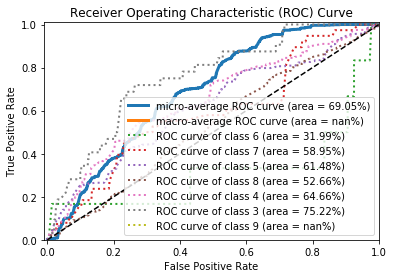

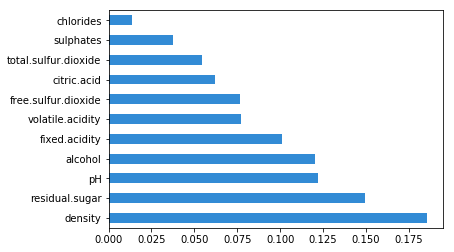

In [53]:
results = mm.get_results(ADAB, 'AdaBoostClassifier', X_test, y_test['l'], gs = gs, target_names = [str(x) for x in y.unique()]
                      ,target_labels=y.unique(), results=results, reasume=False)

In [54]:
results

,Prob,Accuracy,ROC AUC Score,ROC Area
LogisticRegression,True,0.5155,0.598463,NaN
DT First,True,0.5073,0.615640,NaN
LinearSVC,True,0.5191,0.598282,NaN
RF,True,0.6318,0.703590,NaN
KNeighborsClassifier,True,0.6264,0.704421,NaN
LGBM,True,0.6155,0.697762,NaN
XGBC,True,0.6164,0.697700,NaN
GradientBoostingClassifier,True,0.6400,0.712091,NaN
AdaBoostClassifier,True,0.3009,0.532477,NaN


## Stackingは上手くいかなかった

In [ ]:
# sclf = StackingClassifier(classifiers=[RF, XGBC, GBM], # , XGBC
#                           use_probas=False,
#                      q     average_probas=False,
#                           use_features_in_secondary=False,
#                           meta_classifier= RF)

# sclf.fit(X=X_train,y=y_train)

In [ ]:
# results = mm.get_results(sclf, 'sclf', X_test, y_test,[str(x) for x in y.unique()], results=results, reasume=False)

## 精度ごとに重み付け

In [55]:
estimators = [
    ('GBC', GBC),
    ('rf', RF),
    ('knn', KNNC),
    ('gbm', GBM),
    ('xgb', XGBC),
    ('lr', LR),
    ('adab', ADAB),
    ('svc', svc)
    ]

In [56]:
voting = VotingClassifier(estimators,weights=[1.5, 2, 1.5, 1.5, 1, 0.5, 0.5, 0.5], voting='soft')

In [57]:
voting.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.2min finished


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.6min finished


Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    8.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.8min finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:   11.5s finished


Fitting 5 folds for each of 228 candidates, totalling 1140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 498 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 998 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 1140 out of 1140 | elapsed:   53.9s finished
/Users/Zi/anaconda3/envs/jupyter-env/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   46.5s finished


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   50.7s finished


VotingClassifier(estimators=[('GBC',
                              Pipeline(memory=None,
                                       steps=[('scl',
                                               StandardScaler(copy=True,
                                                              with_mean=True,
                                                              with_std=True)),
                                              ('gs',
                                               GridSearchCV(cv=5,
                                                            error_score='raise-deprecating',
                                                            estimator=Pipeline(memory=None,
                                                                               steps=[('lda',
                                                                                       LinearDiscriminantAnalysis(n_components=None,
                                                                                                

In [58]:
filename = '../model/lda_multico_voting_model.pickle'

Model Performance metrics:
------------------------------
Accuracy:  64.00% 
Precision: 65.81% 
Recall:    64.00% 
F1 Score:  62.30% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           6       0.61      0.73      0.66       473
           7       0.71      0.46      0.55       200
           5       0.66      0.73      0.69       351
           8       0.83      0.31      0.45        32
           4       1.00      0.05      0.10        38
           3       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         0

   micro avg       0.64      0.64      0.64      1100
   macro avg       0.54      0.33      0.35      1100
weighted avg       0.66      0.64      0.62      1100


Prediction Confusion Matrix:
------------------------------
          Predicted:                      
                   6   7    5   8  4  3  9
Actual: 6        344  30   98   1  0  0  0
        7        1

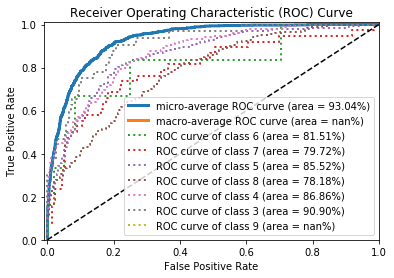

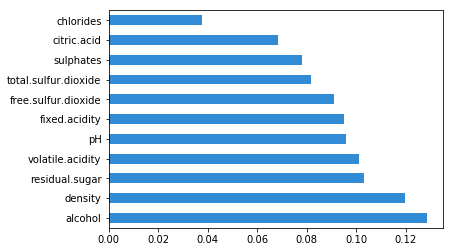

In [60]:
results = mm.get_results(voting, 'voting', X_test, y_test['l'], target_labels = y.unique(), target_names=[str(x) for x in y.unique()],results=results, reasume=False)

In [61]:
results.to_csv('../data/lda_multico_results.csv')

In [62]:
with open(filename, mode='wb') as fp:
    pickle.dump(voting, fp, protocol=2)

In [63]:
results

,Prob,Accuracy,ROC AUC Score,ROC Area
LogisticRegression,True,0.5155,0.598463,NaN
DT First,True,0.5073,0.615640,NaN
LinearSVC,True,0.5191,0.598282,NaN
RF,True,0.6318,0.703590,NaN
KNeighborsClassifier,True,0.6264,0.704421,NaN
LGBM,True,0.6155,0.697762,NaN
XGBC,True,0.6164,0.697700,NaN
GradientBoostingClassifier,True,0.6400,0.712091,NaN
AdaBoostClassifier,True,0.3009,0.532477,NaN
voting,True,0.6400,0.711605,NaN
